<a href="https://colab.research.google.com/github/cotpetru24/data_mining/blob/main/stu124543_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the necessary libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

Import dataset => pd.read_excel() & pd.read_csv()

In [ ]:
# 1 - Import the dataset
df_temp = pd.read_excel("/content/Lobster_Data_Set.xlsx")
# 2 - Convert the dataset to .csv
df_temp.to_csv("/content/lobster_data_set.csv", index = False)
# 3 - Import the dataset in .csv format
df = pd.read_csv("lobster_data_set.csv")

Print the shape and info of the dataframe => df.shape() & df.info()

In [ ]:
print(f"Dataset shape = {df.shape}\n")
print("Dataset info\n")
print(df.info())

Dataset shape = (2097, 8)

Dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               2097 non-null   object 
 1   Length(mm)        2095 non-null   float64
 2   Diameter(mm)      2096 non-null   float64
 3   Height(mm)        2096 non-null   float64
 4   WholeWeight(g)    2096 non-null   float64
 5   ShuckedWeight(g)  2095 non-null   float64
 6   SellWeight(g)     2096 non-null   float64
 7   Spots             2097 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 131.2+ KB
None


Preview the dataset - df.head()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print("Dataset preview:\n")
print(df.head(10))

Dataset preview:

  Sex  Length(mm)  Diameter(mm)  Height(mm)  WholeWeight(g)  ShuckedWeight(g)  SellWeight(g)  Spots
0   M       0.455         0.365       0.095          0.5140            0.2245          0.150     15
1   M       0.350         0.265       0.090          0.2255            0.0995          0.070      7
2   F       0.530         0.420       0.135          0.6770            0.2565          0.210      9
3   M       0.440         0.365       0.125          0.5160            0.2155          0.155     10
4   I       0.330         0.255       0.080          0.2050            0.0895          0.055      7
5   I       0.425         0.300       0.095          0.3515            0.1410          0.120      8
6   F       0.530         0.415       0.150          0.7775            0.2370          0.330     20
7   F       0.545         0.425       0.125          0.7680            0.2940          0.260     16
8   M       0.475         0.370       0.125          0.5095            0.2165     

Display only categorical data

In [ ]:
df_categorical = df.select_dtypes(exclude=np.number)
print(df_categorical)

     Sex
0      M
1      M
2      F
3      M
4      I
...   ..
2092   M
2093   F
2094   I
2095   M
2096   M

[2097 rows x 1 columns]


Identify the unique values of the 'Sex' column

In [ ]:
print(df_categorical.Sex.value_counts())

M    771
I    683
F    641
0      2
Name: Sex, dtype: int64


Drop the rows where "Sex" == '0'

In [ ]:
condition = df[(df['Sex'] == '0')].index
clean_df = df.drop(condition)

Confirm dataframe doesn't contain rows where 'Sex' == '0'

In [ ]:
clean_df_categorical = clean_df.select_dtypes(exclude=np.number)
print(clean_df_categorical.Sex.value_counts())

M    771
I    683
F    641
Name: Sex, dtype: int64


Replace categorical data with numerical and store the unique values of the numerical data in a dictionary

In [ ]:
sex_categorical = { 1: 'M', 2: 'F', 3: 'I'}
clean_df['Sex'].replace({'M': 1, 'F': 2, 'I': 3}, inplace=True)


Confirm categorical values have been replaced and dataframe has been updated

In [ ]:
print(clean_df.info())
print(clean_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2096
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               2095 non-null   int64  
 1   Length(mm)        2093 non-null   float64
 2   Diameter(mm)      2094 non-null   float64
 3   Height(mm)        2094 non-null   float64
 4   WholeWeight(g)    2094 non-null   float64
 5   ShuckedWeight(g)  2093 non-null   float64
 6   SellWeight(g)     2094 non-null   float64
 7   Spots             2095 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 147.3 KB
None
      Sex  Length(mm)  Diameter(mm)  Height(mm)  WholeWeight(g)  ShuckedWeight(g)  SellWeight(g)  Spots
0       1       0.455         0.365       0.095          0.5140            0.2245          0.150     15
1       1       0.350         0.265       0.090          0.2255            0.0995          0.070      7
2       2       0.530         0.420       0.135        


Checking the dataset for missing values and printing the total number of cells where value is missing

In [ ]:
print("Number of cells where value is missing - each column:")
print(clean_df.isnull().sum())
print(f"\nTotal number of cells where value is missing : {clean_df.isnull().sum().sum()}")

Number of cells where value is missing - each column:
Sex                 0
Length(mm)          2
Diameter(mm)        1
Height(mm)          1
WholeWeight(g)      1
ShuckedWeight(g)    2
SellWeight(g)       1
Spots               0
dtype: int64

Total number of cells where value is missing : 8


Conditionally fill missing values with the median value of each column based on Sex and confirm there are no more missing values

In [ ]:
clean_df.loc[clean_df['Sex'] == 1] = (
    clean_df.loc[clean_df['Sex'] == 1].fillna(value=clean_df.loc[clean_df['Sex'] == 1].median(axis=0)))
clean_df.loc[clean_df['Sex'] == 2] = (
    clean_df.loc[clean_df['Sex'] == 2].fillna(value=clean_df.loc[clean_df['Sex'] == 2].median(axis=0)))
clean_df.loc[clean_df['Sex'] == 3] = (
    clean_df.loc[clean_df['Sex'] == 3].fillna(value=clean_df.loc[clean_df['Sex'] == 3].median(axis=0)))

print("\nNumber of cells where value is missing after .fillna() - each column:")
print(clean_df.isnull().sum())
print(f"\nTotal number of cells where value is missing after .fillna() : {clean_df.isnull().sum().sum()}")


Number of cells where value is missing after .fillna() - each column:
Sex                 0
Length(mm)          0
Diameter(mm)        0
Height(mm)          0
WholeWeight(g)      0
ShuckedWeight(g)    0
SellWeight(g)       0
Spots               0
dtype: int64

Total number of cells where value is missing after .fillna() : 0


Check for outliers using boxplot

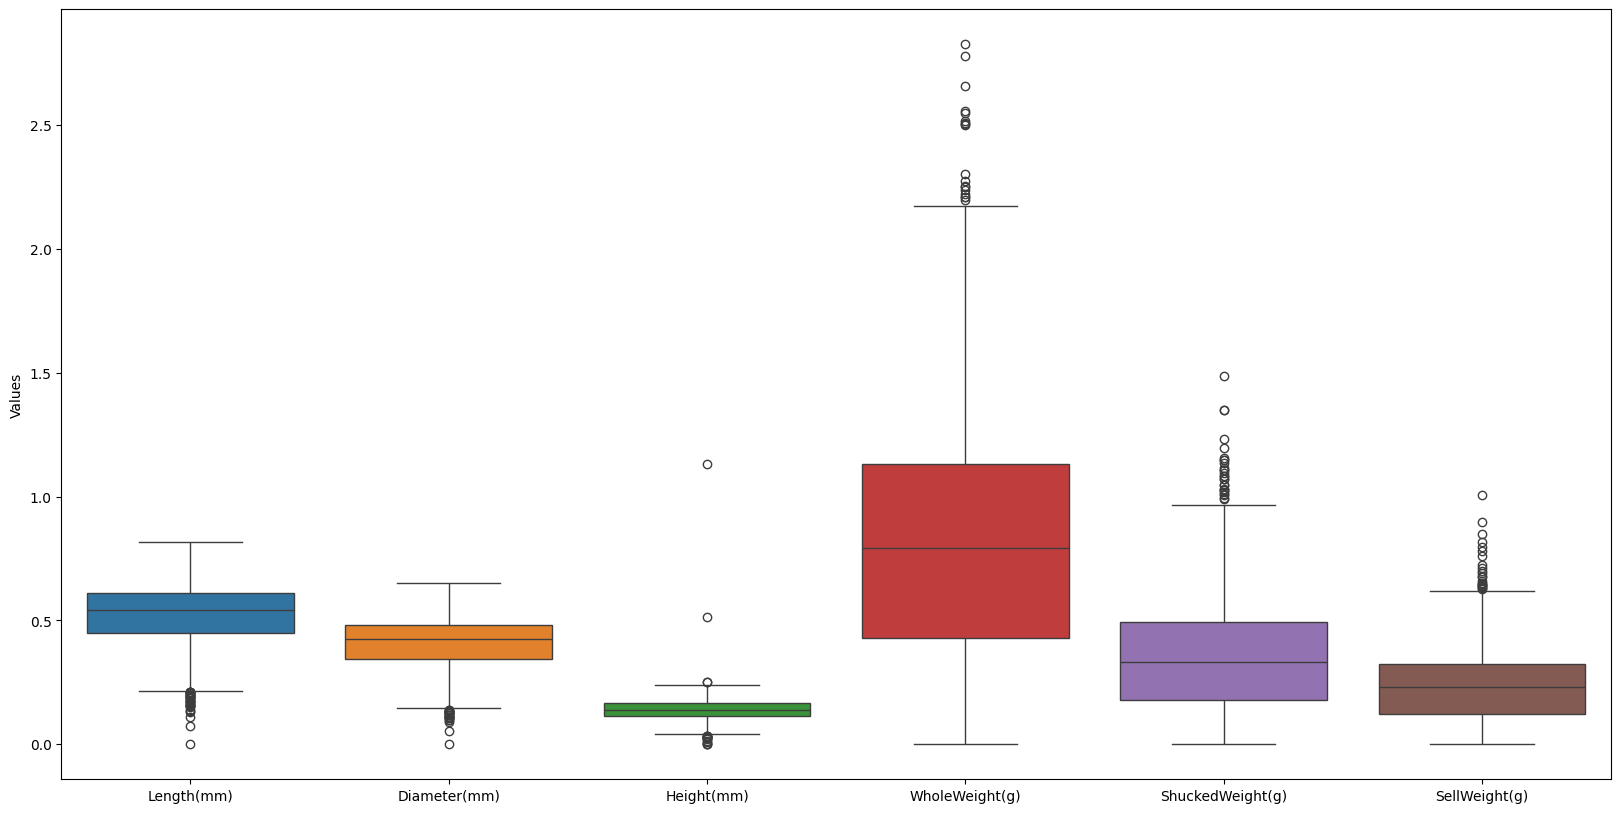

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.boxplot(data=clean_df.iloc[:,1:-1], orient='v')
plt.ylabel('Values')
plt.show()

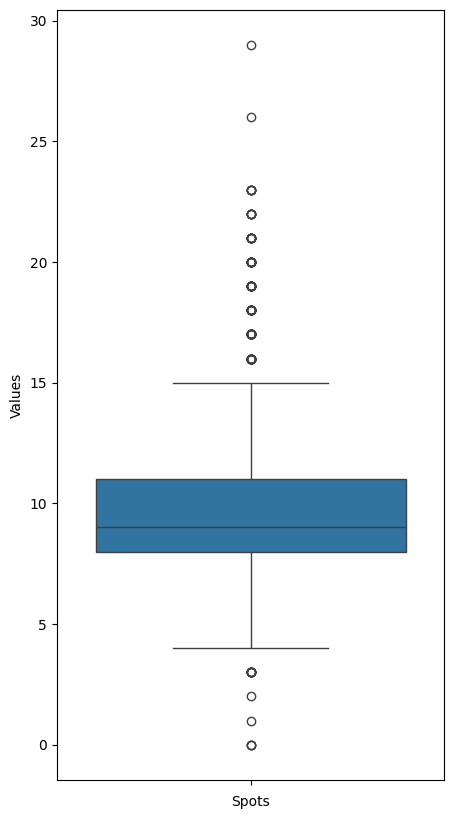

In [ ]:
plt.rcParams['figure.figsize'] = [5, 10]
sns.boxplot(data=clean_df['Spots'], orient='v')
plt.ylabel('Values')
plt.xlabel('Spots')
plt.show()

Remove outliers using the Interquartile range (IQR) method

In [196]:
Outlier = []

# Initialize an empty index list to capture the indices of all outliers
Index_Outlier = []

for col in clean_df.columns[1:]:
    # Check if the column is numeric since percentile calculation requires numeric values
    if np.issubdtype(clean_df[col].dtype, np.number):
        Q1 = np.percentile(clean_df[col], 25, interpolation='midpoint')
        Q3 = np.percentile(clean_df[col], 75, interpolation='midpoint')
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        print(f"{col} percentiles are=> 0.25: {Q1}, 0.75: {Q3}")
        print(f"{col} IQR is {IQR}")
        print(f"{col} lower_bound is {lower_bound}, upper_bound is {upper_bound}\n")

        # Identify outliers
        is_outlier = ((clean_df[col] < lower_bound) | (clean_df[col] <= 0)) | (clean_df[col] > upper_bound)
        outliers = clean_df[col][is_outlier]
        Outlier.extend(outliers.tolist())

        # Collect indices of the outliers
        Index_Outlier.extend(outliers.index.tolist())

# Removing duplicate indices in case a row is an outlier in multiple columns
Index_Outlier = list(set(Index_Outlier))

# Dropping the outliers from the DataFrame
clean_df = clean_df.drop(Index_Outlier)







Length(mm) percentiles are=> 0.25: 0.445, 0.75: 0.605
Length(mm) IQR is 0.15999999999999998
Length(mm) lower_bound is 0.20500000000000004, upper_bound is 0.845

Diameter(mm) percentiles are=> 0.25: 0.34, 0.75: 0.475
Diameter(mm) IQR is 0.13499999999999995
Diameter(mm) lower_bound is 0.1375000000000001, upper_bound is 0.6774999999999999

Height(mm) percentiles are=> 0.25: 0.11, 0.75: 0.16
Height(mm) IQR is 0.05
Height(mm) lower_bound is 0.03499999999999999, upper_bound is 0.23500000000000001

WholeWeight(g) percentiles are=> 0.25: 0.41674999999999995, 0.75: 1.1005
WholeWeight(g) IQR is 0.6837500000000001
WholeWeight(g) lower_bound is -0.6088750000000003, upper_bound is 2.126125

ShuckedWeight(g) percentiles are=> 0.25: 0.17575, 0.75: 0.47975
ShuckedWeight(g) IQR is 0.30400000000000005
ShuckedWeight(g) lower_bound is -0.2802500000000001, upper_bound is 0.9357500000000001

SellWeight(g) percentiles are=> 0.25: 0.12, 0.75: 0.30574999999999997
SellWeight(g) IQR is 0.18574999999999997
SellWe

Confirm outliers have been removed

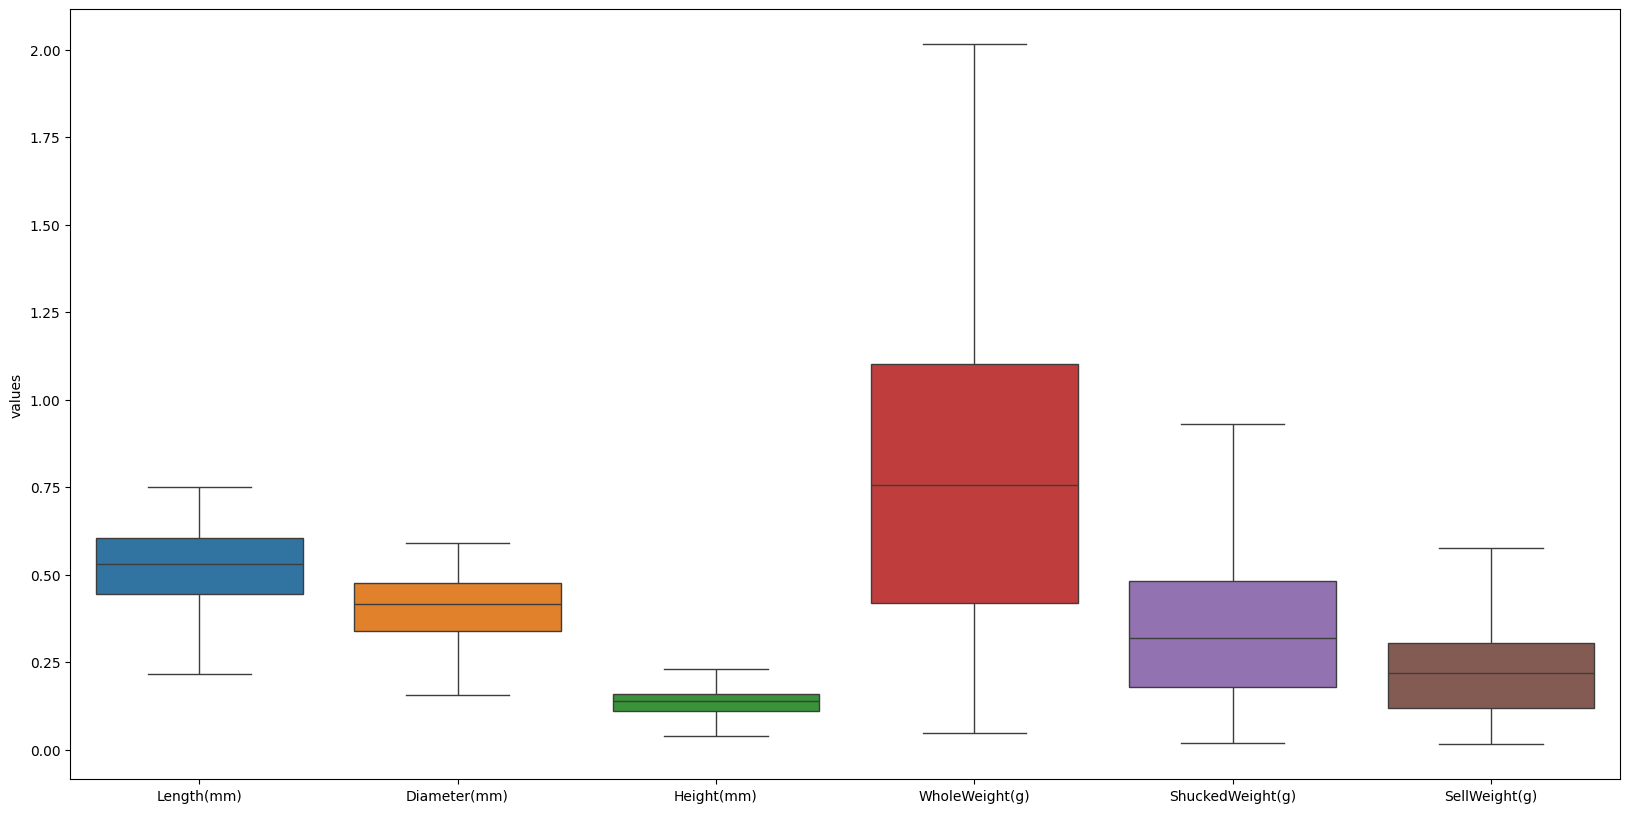

In [197]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.boxplot(data=clean_df.iloc[:,1:-1], orient='v')
plt.ylabel('values')
plt.show()

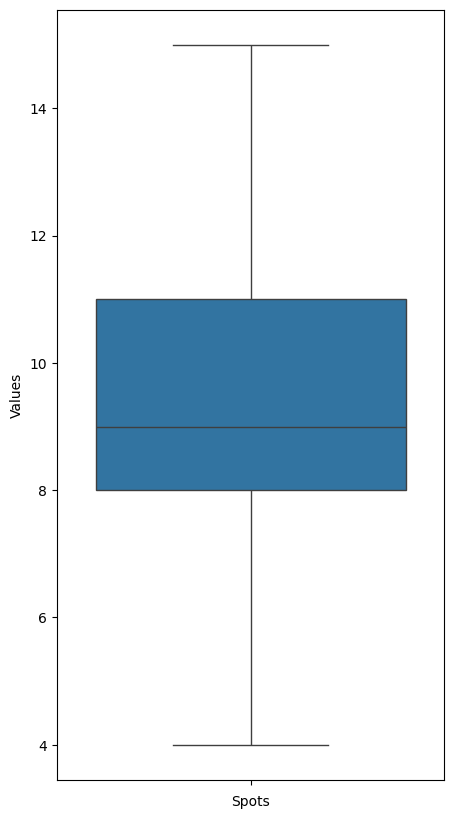

In [198]:
plt.rcParams['figure.figsize'] = [5, 10]
sns.boxplot(data=clean_df['Spots'], orient='v')
plt.ylabel('Values')
plt.xlabel('Spots')
plt.show()

View descriptive statistics after outliers have been removed

In [199]:
print(clean_df.describe())

               Sex   Length(mm)  Diameter(mm)   Height(mm)  WholeWeight(g)  ShuckedWeight(g)  SellWeight(g)        Spots
count  1863.000000  1863.000000   1863.000000  1863.000000     1863.000000       1863.000000    1863.000000  1863.000000
mean      1.975845     0.517689      0.402021     0.136331        0.775702          0.340689       0.221017     9.361245
std       0.840667     0.110883      0.092094     0.034693        0.436483          0.200701       0.119988     2.322759
min       1.000000     0.215000      0.155000     0.040000        0.046500          0.018000       0.015000     4.000000
25%       1.000000     0.445000      0.340000     0.110000        0.418750          0.177250       0.120000     8.000000
50%       2.000000     0.530000      0.415000     0.140000        0.754500          0.320000       0.219000     9.000000
75%       3.000000     0.605000      0.475000     0.160000        1.100500          0.480250       0.305750    11.000000
max       3.000000     0.750000 

Distribution of each variable

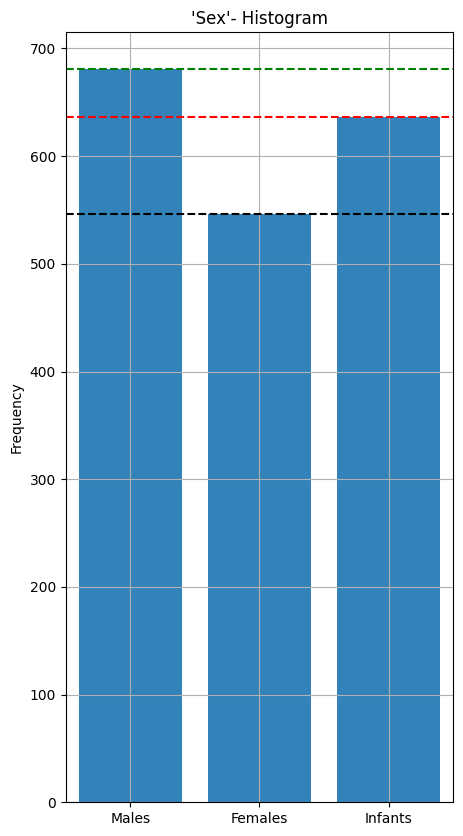

In [200]:
counts = clean_df['Sex'].value_counts().sort_index()
line_colors = ['green', 'black', 'red']
fig, ax = plt.subplots()
bars = ax.bar(counts.index, counts.values, tick_label=['Males', 'Females', 'Infants'], alpha=0.7)
plt.xlim(0.5, 3.5)
xlims = plt.xlim()
# Adding horizontal lines across the plot for each bar, with different colors
for bar, color in zip(bars, line_colors):
    plt.hlines(bar.get_height(), xlims[0], xlims[1], color=color, linestyles='dashed')

plt.hist(data=clean_df, x='Sex', rwidth=0.8, bins=[0.5, 1.5, 2.5, 3.5], alpha=0.7)
plt.title("'Sex'- Histogram")
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

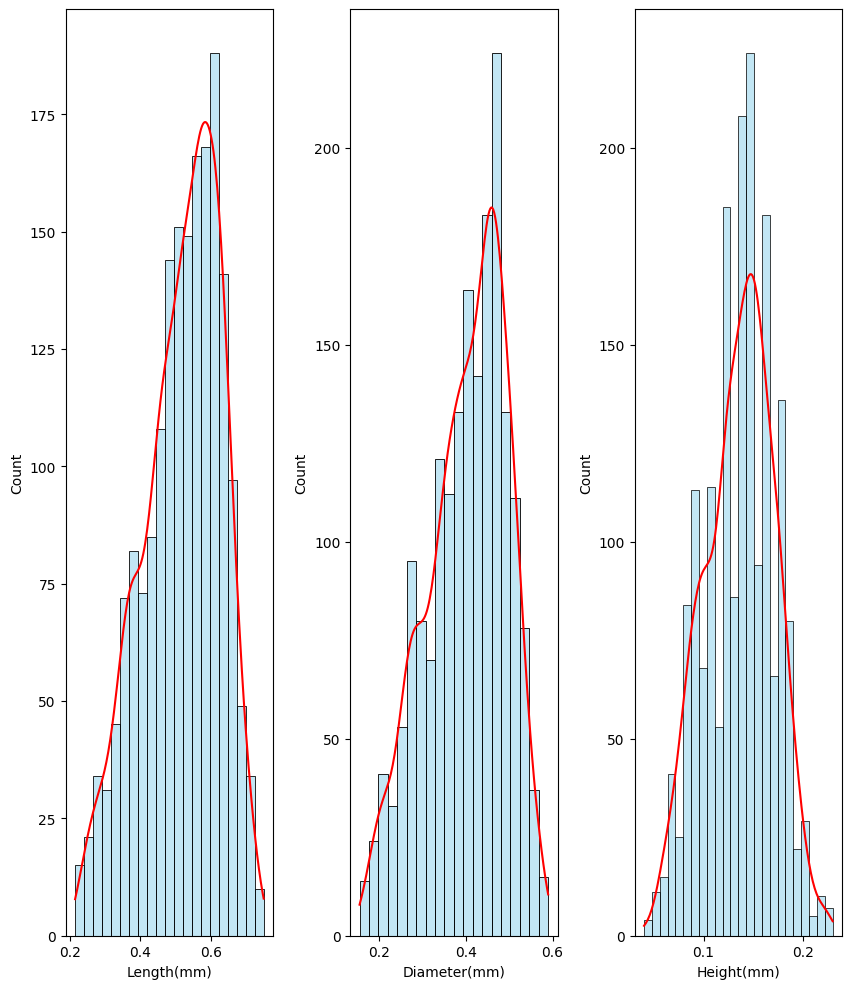

In [215]:
plt.figure(figsize=(20, 10))
plotnumber=1
for col in clean_df.columns[1:4]:#['Length(mm)', 'ShuckedWeight(g)', 'WholeWeight(g)']:
    if plotnumber <= 7:
        plt.subplot(1,7, plotnumber)
        plot = sns.histplot(clean_df[col], kde=True, color='skyblue')
        plot.lines[0].set_color('red')
    plotnumber+=1
plt.tight_layout()
plt.show()

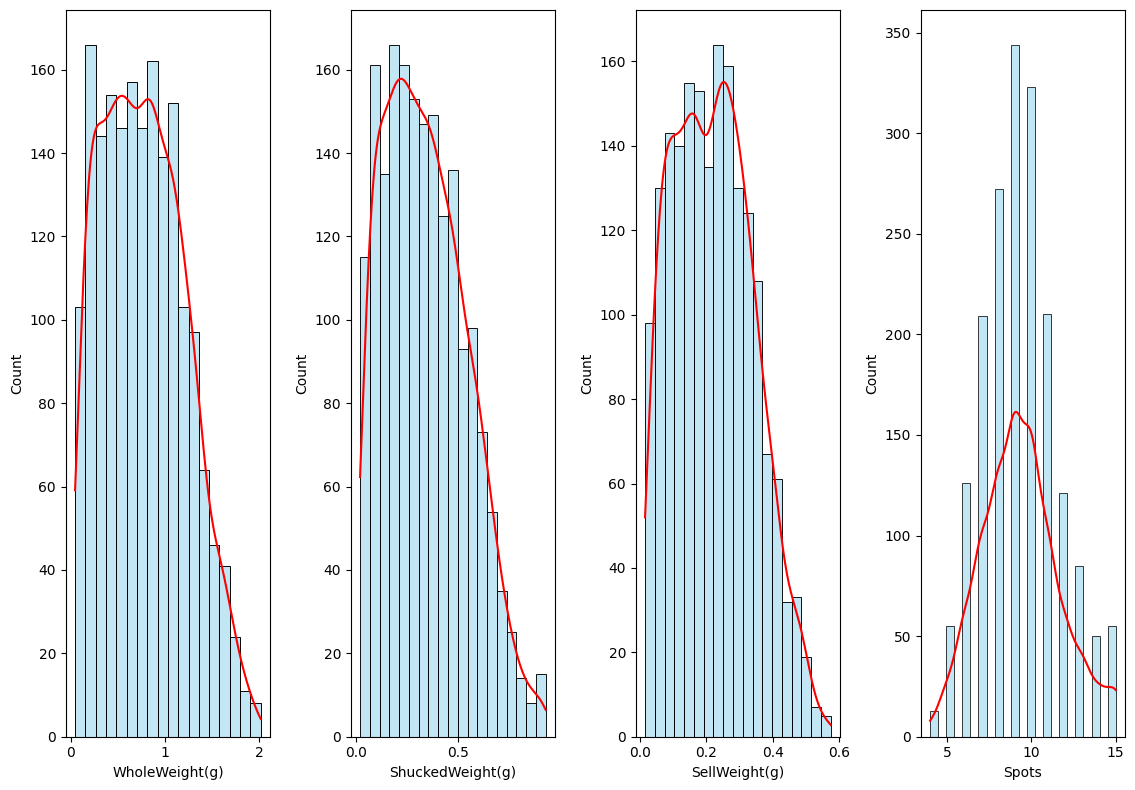

In [214]:
plt.figure(figsize=(20, 8))
plotnumber=1
for col in clean_df.columns[4:8]:#['Length(mm)', 'ShuckedWeight(g)', 'WholeWeight(g)']:
    if plotnumber <= 7:
        plt.subplot(1,7, plotnumber)
        plot = sns.histplot(clean_df[col], kde=True, color='skyblue')
        plot.lines[0].set_color('red')
    plotnumber+=1
plt.tight_layout()
plt.show()

Pie chart for "Sex" column

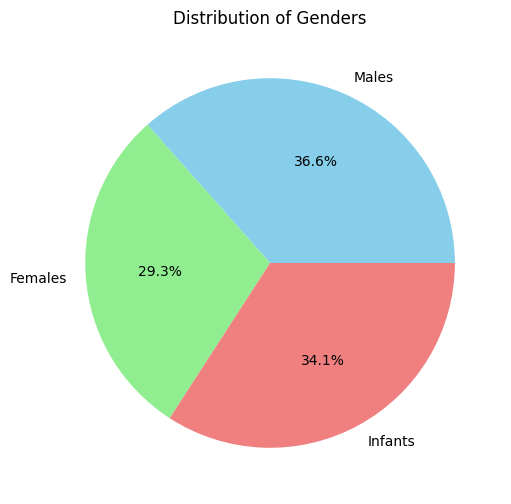

In [202]:
labels = ['Males', 'Females', 'Infants']
colors = ['skyblue', 'lightgreen', 'lightcoral']
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Genders')
plt.show()

Scatter plots

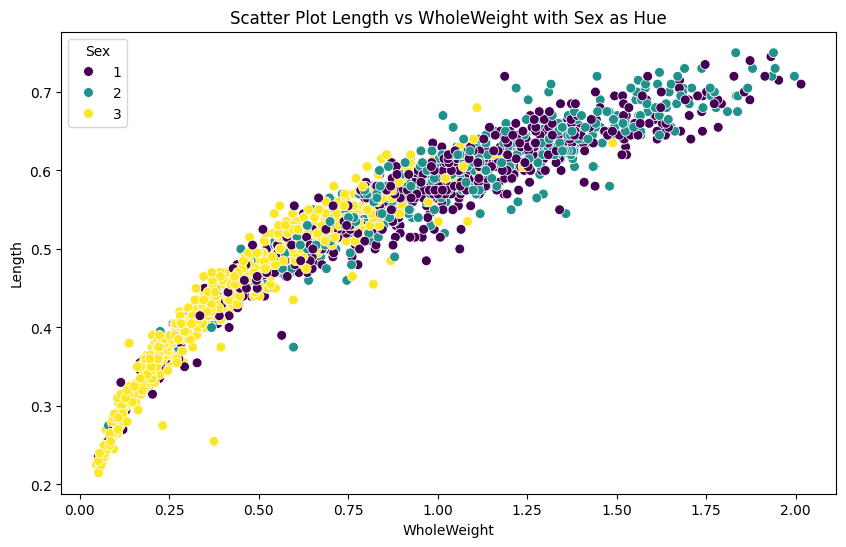

In [203]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_df, x='WholeWeight(g)', y='Length(mm)', hue='Sex', palette='viridis', s=50)
plt.xlabel('WholeWeight')
plt.ylabel('Length')
plt.title('Scatter Plot Length vs WholeWeight with Sex as Hue')
plt.legend(title='Sex')
plt.show()

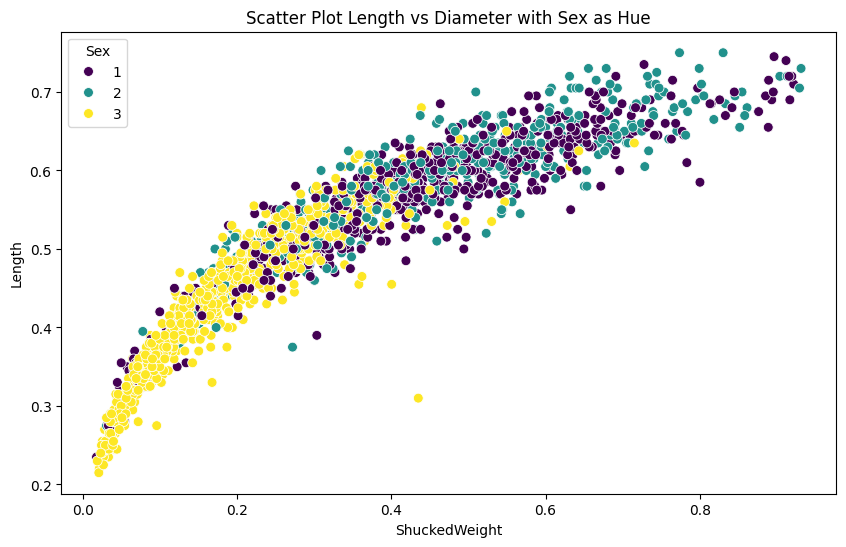

In [204]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_df, x='ShuckedWeight(g)', y='Length(mm)', hue='Sex', palette='viridis', s=50)
plt.xlabel('ShuckedWeight')
plt.ylabel('Length')
plt.title('Scatter Plot Length vs Diameter with Sex as Hue')
plt.legend(title='Sex')
plt.show()

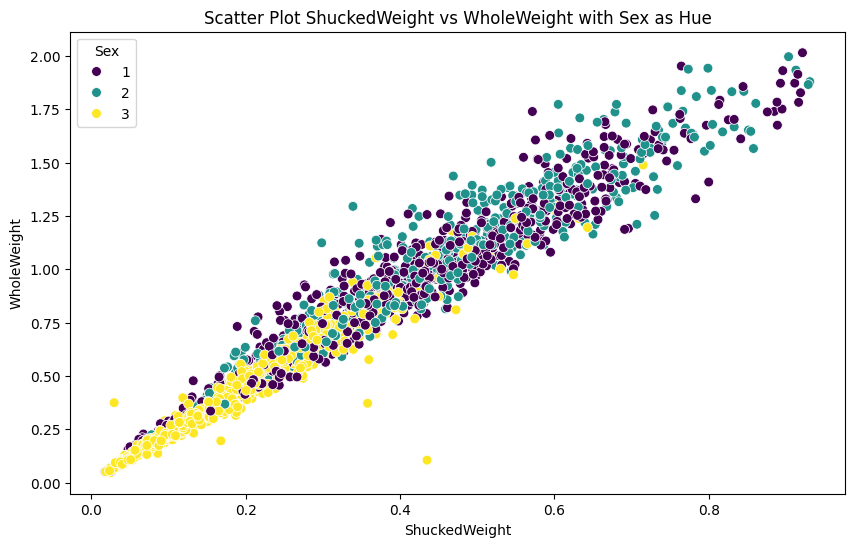

In [205]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_df, x='ShuckedWeight(g)', y='WholeWeight(g)', hue='Sex', palette='viridis', s=50)
plt.xlabel('ShuckedWeight')
plt.ylabel('WholeWeight')
plt.title('Scatter Plot ShuckedWeight vs WholeWeight with Sex as Hue')
plt.legend(title='Sex')
plt.show()

Correlation between columns

                       Sex  Length(mm)  Diameter(mm)  Height(mm)  WholeWeight(g)  ShuckedWeight(g)  SellWeight(g)     Spots
Sex               1.000000   -0.437279     -0.448604   -0.454116       -0.463888         -0.440847      -0.453234 -0.406102
Length(mm)       -0.437279    1.000000      0.986049    0.896056        0.941056          0.915871       0.924137  0.587578
Diameter(mm)     -0.448604    0.986049      1.000000    0.902923        0.939483          0.909806       0.930700  0.605477
Height(mm)       -0.454116    0.896056      0.902923    1.000000        0.893838          0.849937       0.902336  0.611978
WholeWeight(g)   -0.463888    0.941056      0.939483    0.893838        1.000000          0.974243       0.963488  0.562430
ShuckedWeight(g) -0.440847    0.915871      0.909806    0.849937        0.974243          1.000000       0.905650  0.472141
SellWeight(g)    -0.453234    0.924137      0.930700    0.902336        0.963488          0.905650       1.000000  0.623547
Spots   

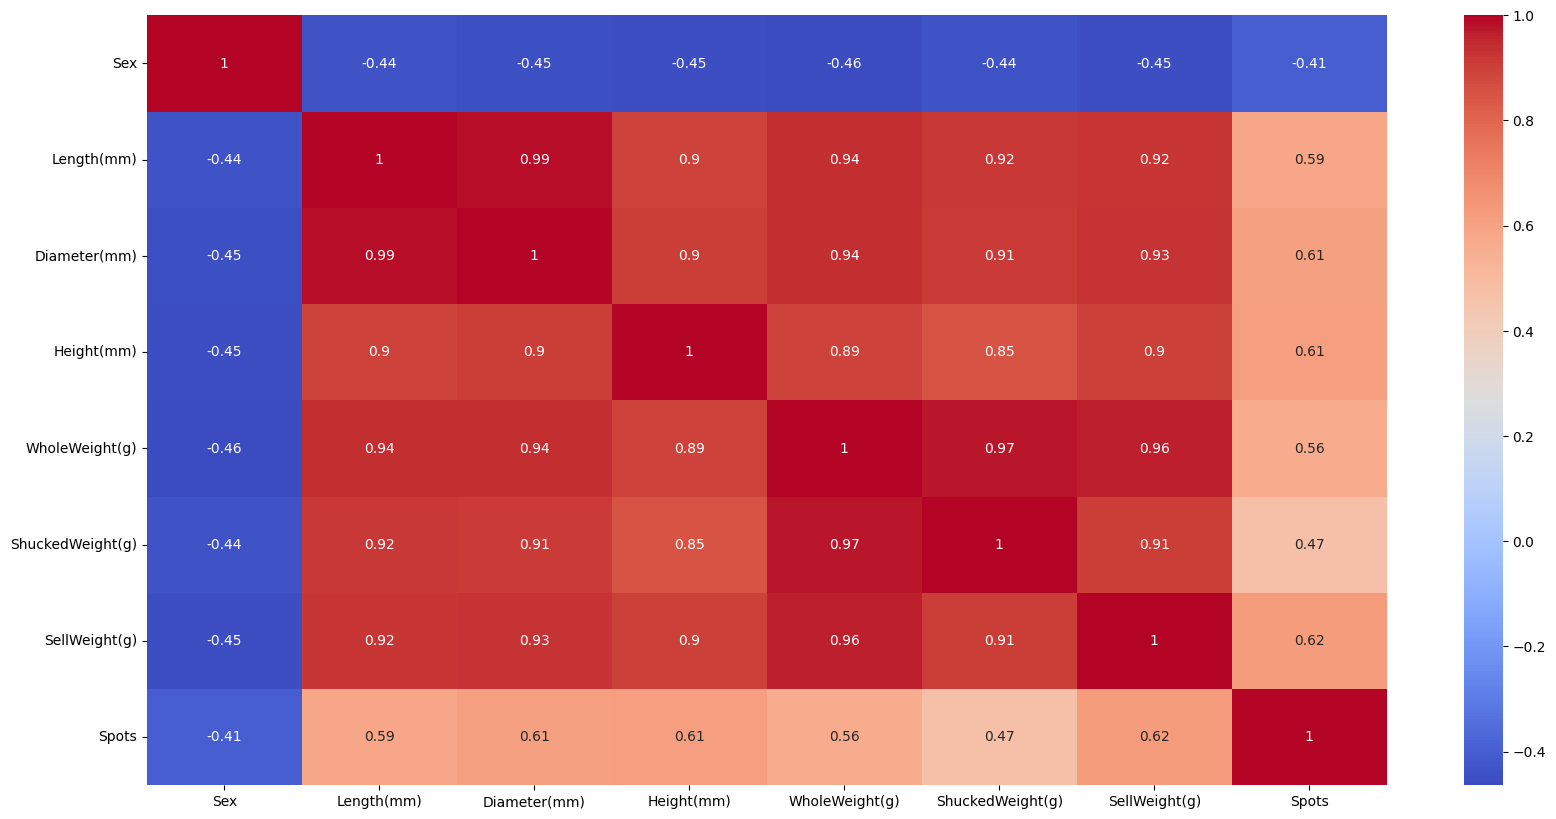

In [ ]:
print(clean_df.corr())
sns.heatmap(clean_df.corr(), annot=True, cmap='coolwarm')
plt.show()

Linear regression

In [ ]:
X = clean_df[['WholeWeight(g)']]
y = clean_df['Length(mm)']

# Dividing the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the trained model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.5f}")
print(f"R^2 Score: {r2:.5f}")


Mean Squared Error: 0.00139
R^2 Score: 0.89168


Scatter plot for linear regression and regression line

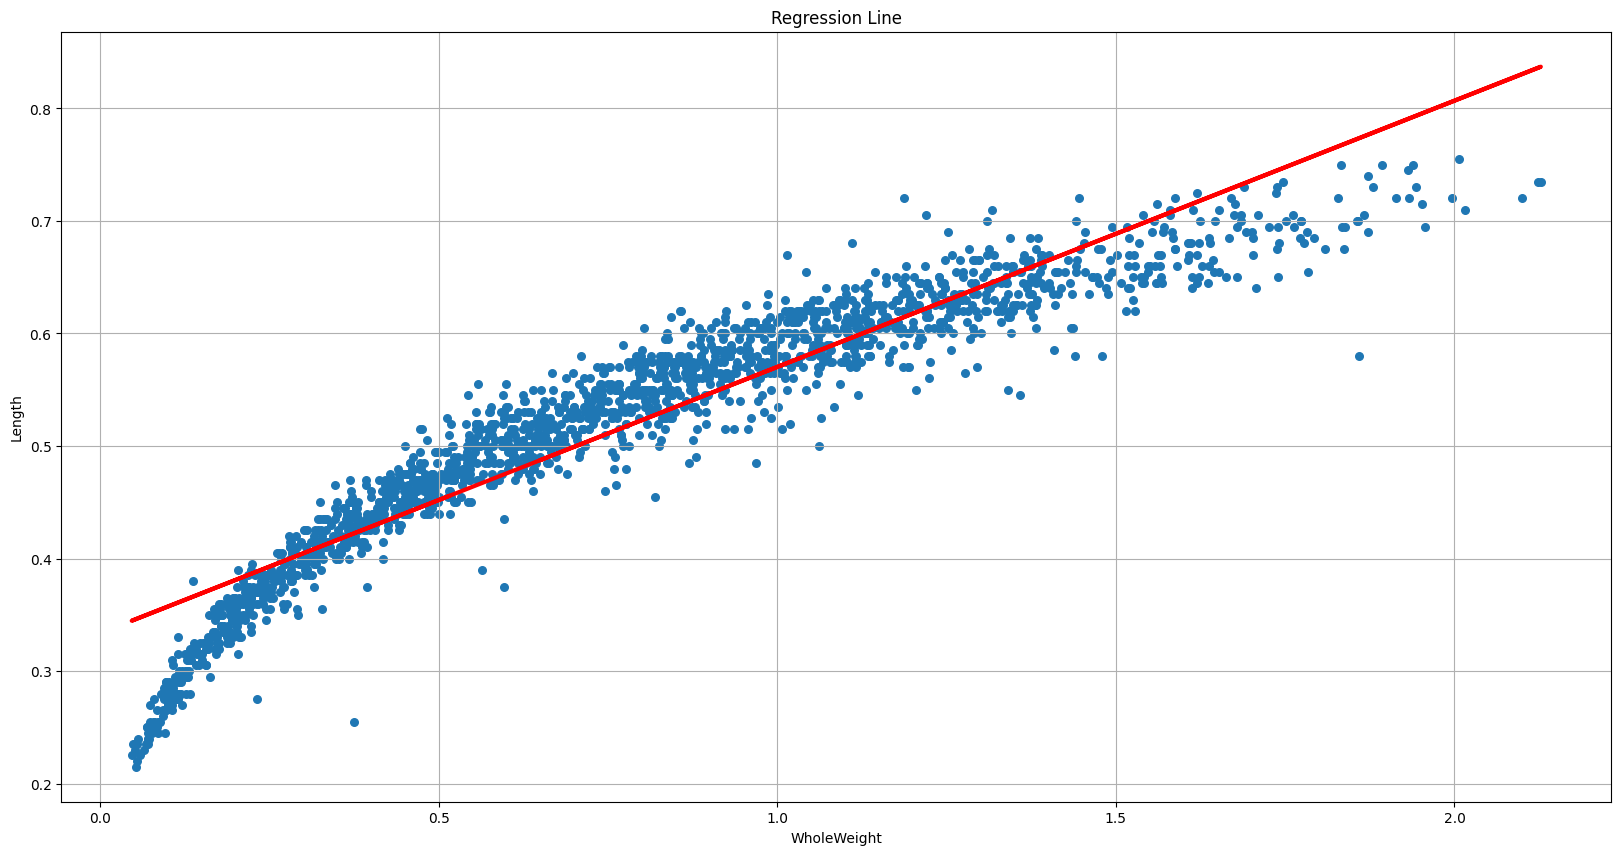

In [ ]:
X = clean_df['WholeWeight(g)'].values.reshape(-1, 1)
y = clean_df[['Length(mm)']].values

def estimate_coef(x, y):
    n = np.size(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    SS_xy = np.sum(y*x) - n*mean_y*mean_x
    SS_xx = np.sum(x*x) - n*mean_x*mean_x
    b_1 = SS_xy / SS_xx
    b_0 = mean_y - b_1*mean_x
    return (b_0, b_1)

def regression_line_plot(x, y, b):
    plt.scatter(x, y, marker="o", s=30)
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color="red", linewidth=3)
    plt.xlabel('WholeWeight')
    plt.ylabel('Length')
    plt.title('Regression Line')
    plt.grid(True)
    plt.show()

b = estimate_coef(X, y)
regression_line_plot(X, y, b)


Hierarchical Clustering

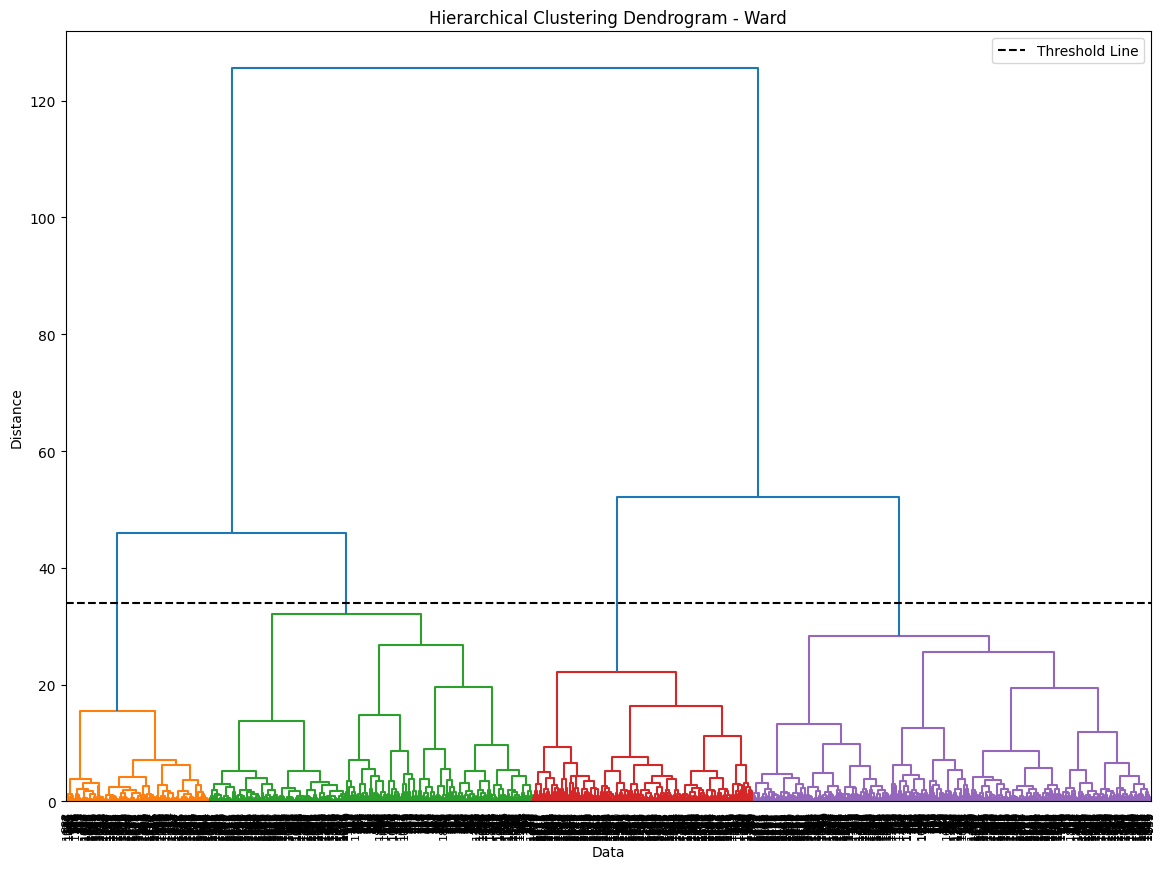

Clusters: [1 2 3 4]


In [ ]:
#Preprocessing
scaler = StandardScaler()
clean_df_scaled = scaler.fit_transform(clean_df)

#Hierarchical Clustering Ward method
Z = linkage (clean_df_scaled, method='ward', metric='euclidean')

#Plot the Dendrogram
plt.figure(figsize=(14, 10))
plt.title('Hierarchical Clustering Dendrogram - Ward')
plt.xlabel('Data')
plt.ylabel('Distance')
max_d = 34
dendrogram(Z, color_threshold=max_d, leaf_rotation=90., leaf_font_size=8.)
plt.axhline(y=max_d, color='black', linestyle='--', label='Threshold Line')
plt.legend()
plt.show()

fl = fcluster(Z,4, criterion='maxclust')
print(f"Clusters: {np.unique(fl)}")

Using Agglomerative Clustering to plot Scatter plots

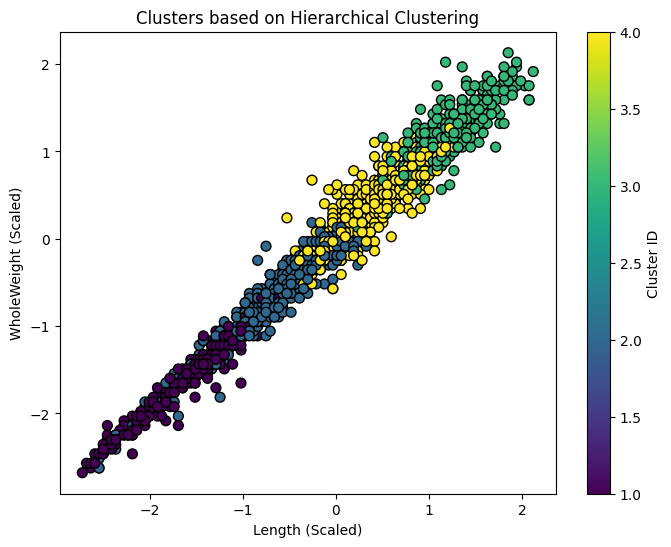

In [ ]:
Z = AgglomerativeClustering(n_clusters=4, linkage='ward')
plt.figure(figsize=(8, 6))
plt.scatter(clean_df_scaled[:, 1], clean_df_scaled[:, 2], c=fl, cmap='viridis', edgecolor='k', s=50)
plt.title('Clusters based on Hierarchical Clustering')
plt.xlabel('Length (Scaled)')
plt.ylabel('WholeWeight (Scaled)')
plt.colorbar(label='Cluster ID')
plt.show()

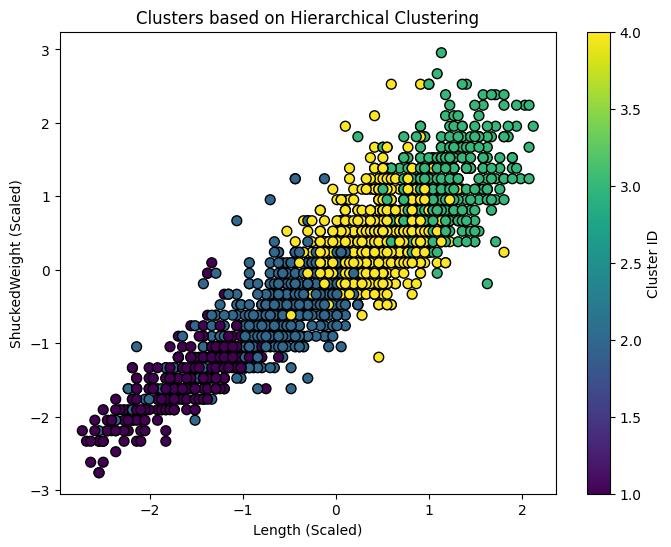

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(clean_df_scaled[:, 1], clean_df_scaled[:, 3], c=fl, cmap='viridis', edgecolor='k', s=50)
plt.title('Clusters based on Hierarchical Clustering')
plt.xlabel('Length (Scaled)')
plt.ylabel('ShuckedWeight (Scaled)')
plt.colorbar(label='Cluster ID')
plt.show()

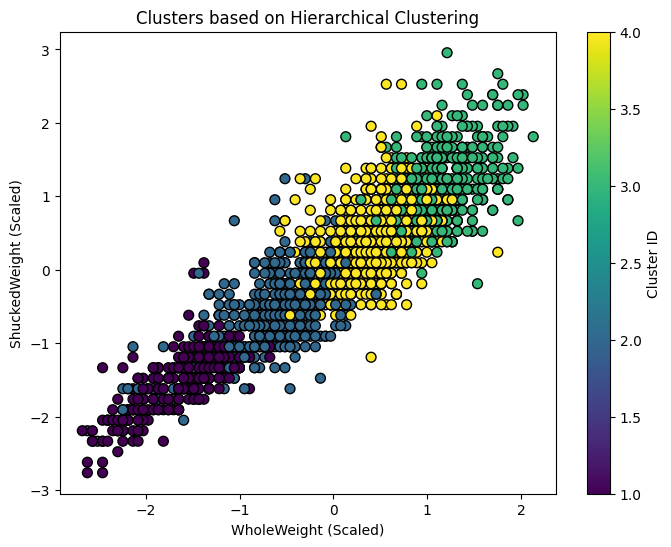

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(clean_df_scaled[:, 2], clean_df_scaled[:, 3], c=fl, cmap='viridis', edgecolor='k', s=50)
plt.title('Clusters based on Hierarchical Clustering')
plt.xlabel('WholeWeight (Scaled)')
plt.ylabel('ShuckedWeight (Scaled)')
plt.colorbar(label='Cluster ID')
plt.show()

K-Means Clustering for Length and WholeWeight

For n_clusters=2, the silhouette score is 0.5853955792961606
For n_clusters=3, the silhouette score is 0.5474876397179198
For n_clusters=4, the silhouette score is 0.5282293759836775
For n_clusters=5, the silhouette score is 0.5362395071292084
For n_clusters=6, the silhouette score is 0.5224839933226146
For n_clusters=7, the silhouette score is 0.5182218108417088
For n_clusters=8, the silhouette score is 0.514841321499784
For n_clusters=9, the silhouette score is 0.49408421808425335
For n_clusters=10, the silhouette score is 0.4846910773582848


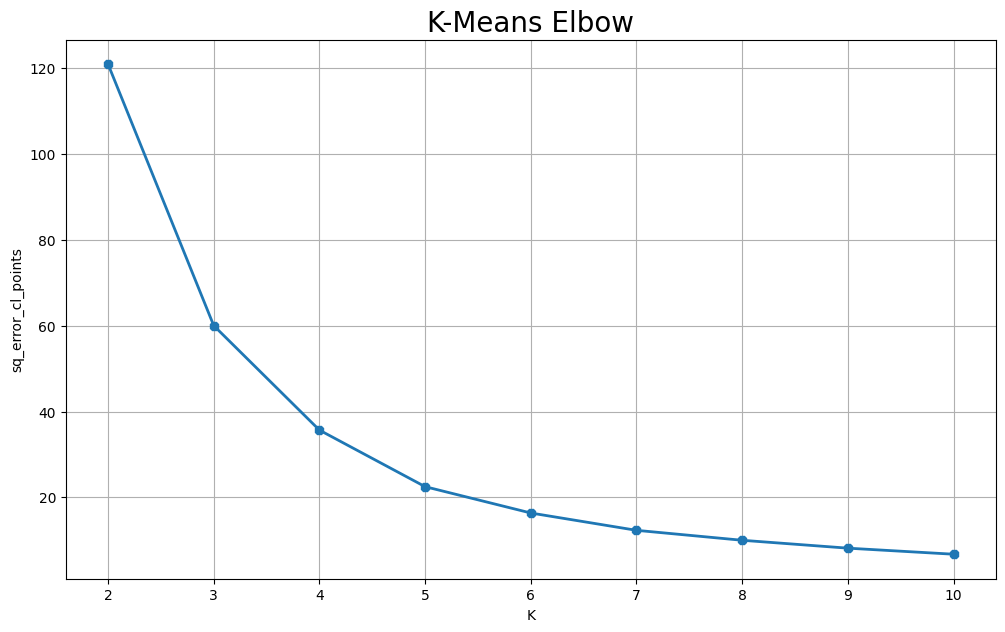

In [ ]:
X1 = clean_df[['Length(mm)', 'WholeWeight(g)']].values
sq_error_cl_point=[]
silhouette_scores = []
for k in range(2, 11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    sq_error_cl_point.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X1, labels, metric='euclidean')
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters={k}, the silhouette score is {silhouette_avg}")

# Plotting the elbow method graph
plt.figure(figsize=(12, 7))
plt.plot(range(2, 11), sq_error_cl_point, linewidth=2, marker='8')
plt.title('K-Means Elbow', fontsize=20)
plt.xlabel('K')
plt.ylabel('sq_error_cl_points')
plt.grid(True)
plt.show()

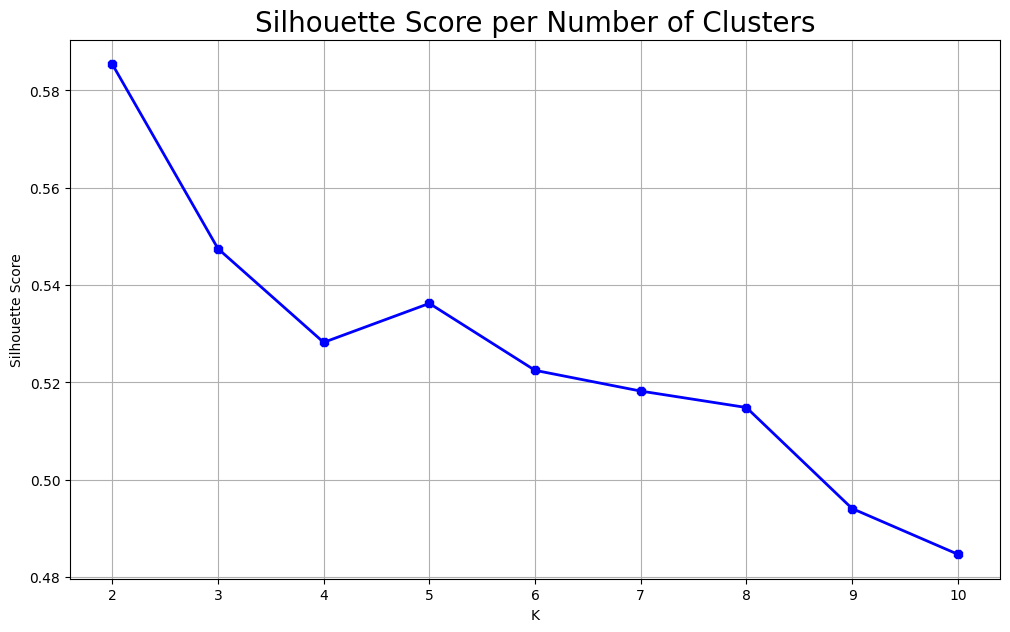

In [ ]:
# Plotting silhouette scores
plt.figure(figsize=(12, 7))
plt.plot(range(2, 11), silhouette_scores, linewidth=2, marker='8', color='blue')
plt.title('Silhouette Score per Number of Clusters', fontsize=20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Predict the model

In [ ]:
kmeans=KMeans(n_clusters=4)
labels=kmeans.fit_predict(X1)
print(labels[:100])

[1 3 1 1 3 3 1 1 3 1 1 3 3 3 3 3 2 1 2 2 2 2 2 2 2 0 0 1 1 2 3 3 1 3 3 1 1
 3 1 1 3 1 1 3 1 3 1 3 1 3 1 1 3 1 1 2 2 1 3 1 3 2 2 2 2 2 1 2 2 2 2 2 2 1
 2 1 1 2 2 0 0 1 1 1 1 3 1 2 1 2 1 1 1 1 3 1 3 3 3 1]


Centroid points and scatter plot for k==4

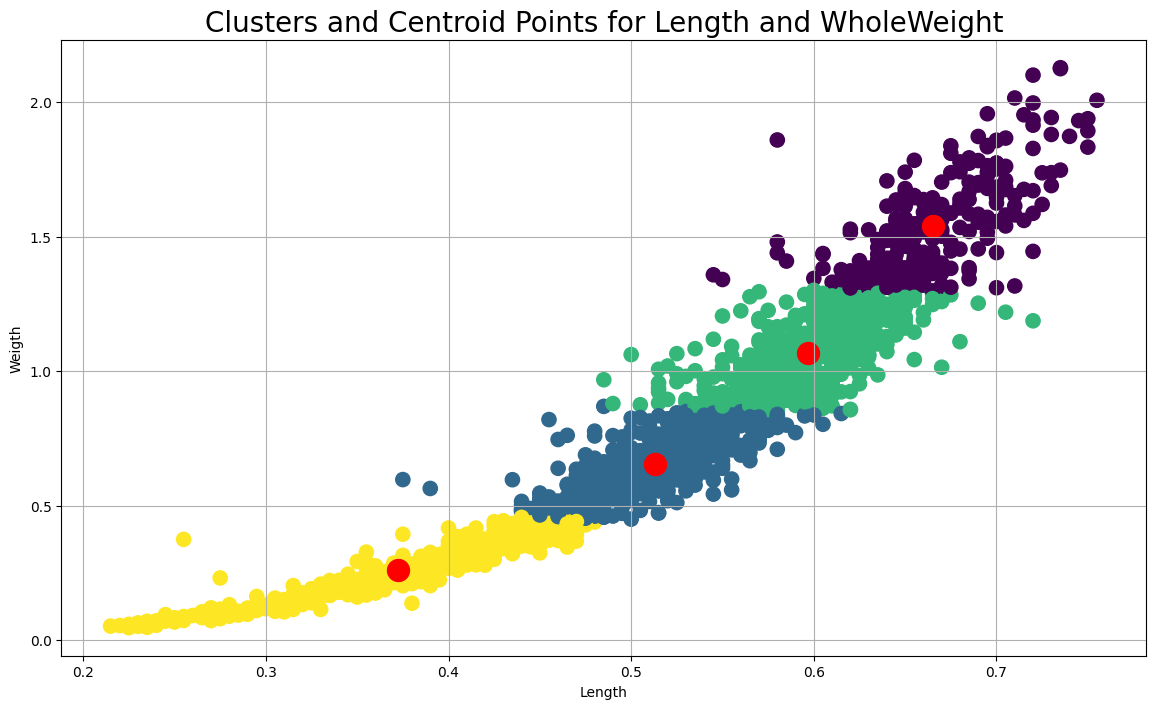

In [ ]:
plt.figure(figsize=(14, 8))
plt.scatter(X1[:, 0], X1[:, 1], c=kmeans.labels_, s=105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], color='red', s=250)
plt.title('Clusters and Centroid Points for Length and WholeWeight', fontsize=20)
plt.xlabel('Length')
plt.ylabel('Weigth')
plt.grid(True)
plt.show()

K-Means Clustering for Length and ShuckedWeight

For n_clusters=2, the silhouette score is 0.563192588041762
For n_clusters=3, the silhouette score is 0.5153870362477636
For n_clusters=4, the silhouette score is 0.49912776479551135
For n_clusters=5, the silhouette score is 0.4811024631325973
For n_clusters=6, the silhouette score is 0.46523816530600964
For n_clusters=7, the silhouette score is 0.45079871926816667
For n_clusters=8, the silhouette score is 0.44523268885488143
For n_clusters=9, the silhouette score is 0.4325256594785915
For n_clusters=10, the silhouette score is 0.42001336936257005


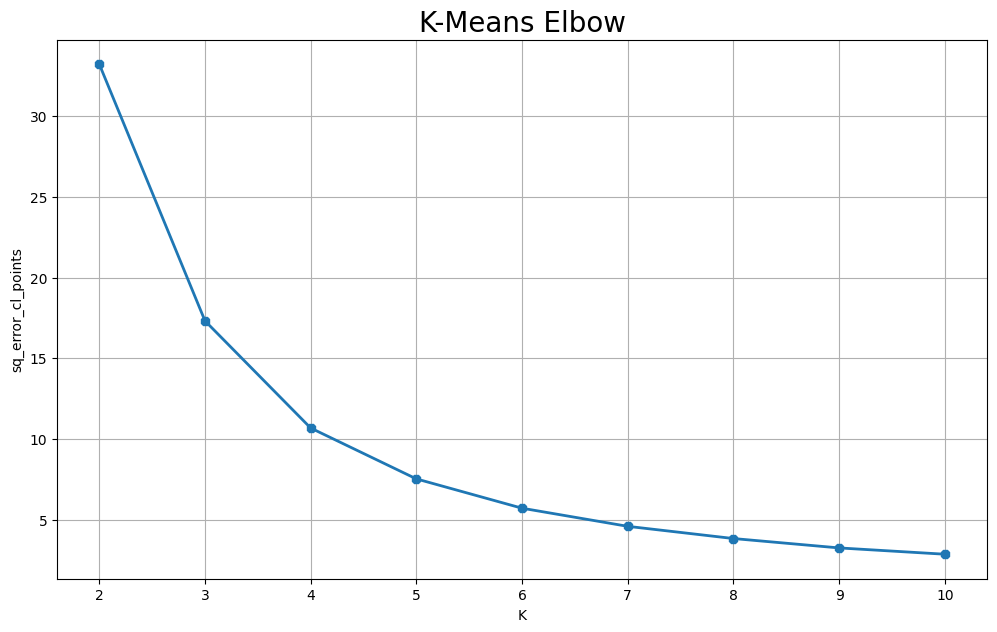

In [ ]:
X2 = clean_df[['Length(mm)', 'ShuckedWeight(g)']].values
sq_error_cl_point=[]
silhouette_scores = []
for k in range(2, 11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    sq_error_cl_point.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X2, labels, metric='euclidean')
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters={k}, the silhouette score is {silhouette_avg}")

# Plotting the elbow method graph
plt.figure(figsize=(12, 7))
plt.plot(range(2, 11), sq_error_cl_point, linewidth=2, marker='8')
plt.title('K-Means Elbow', fontsize=20)
plt.xlabel('K')
plt.ylabel('sq_error_cl_points')
plt.grid(True)
plt.show()

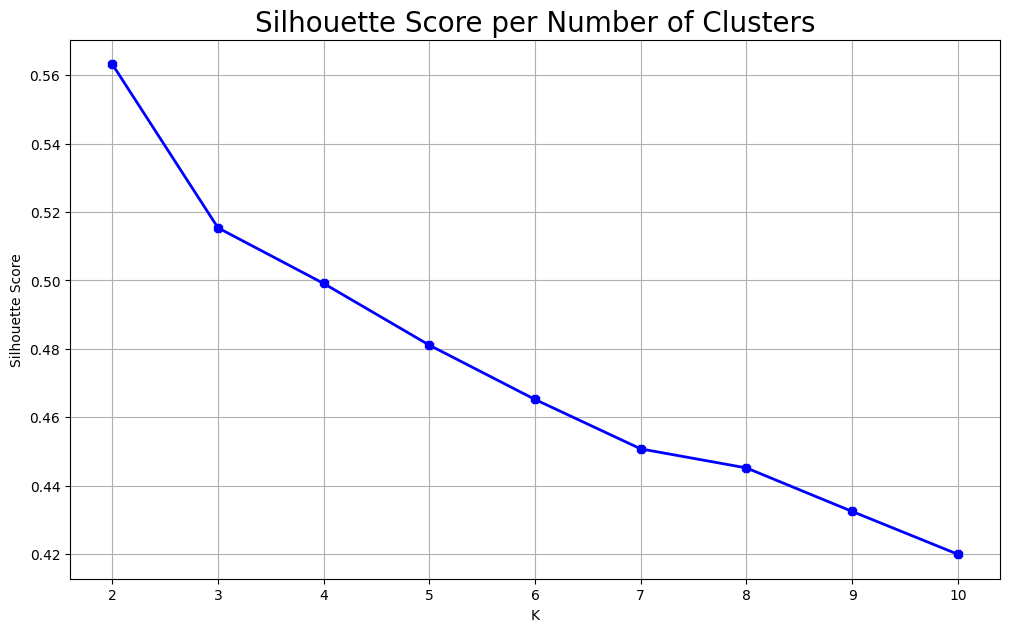

In [ ]:
# Plotting silhouette scores
plt.figure(figsize=(12, 7))
plt.plot(range(2, 11), silhouette_scores, linewidth=2, marker='8', color='blue')
plt.title('Silhouette Score per Number of Clusters', fontsize=20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Predict the model

In [ ]:
kmeans=KMeans(n_clusters=4)
labels=kmeans.fit_predict(X2)
print(labels[:100])

[2 0 2 2 0 0 2 2 0 2 2 0 2 0 2 0 1 2 1 1 1 1 1 1 1 3 3 2 2 1 0 2 1 0 0 2 2
 0 2 2 0 2 2 0 2 2 2 0 2 2 2 2 0 2 2 1 1 2 0 2 0 1 1 1 1 1 2 1 1 1 2 1 2 2
 2 2 2 1 1 3 3 2 2 2 2 0 2 2 2 1 2 2 2 2 0 2 2 0 0 2]


Centroid points and scatter plot for k==4

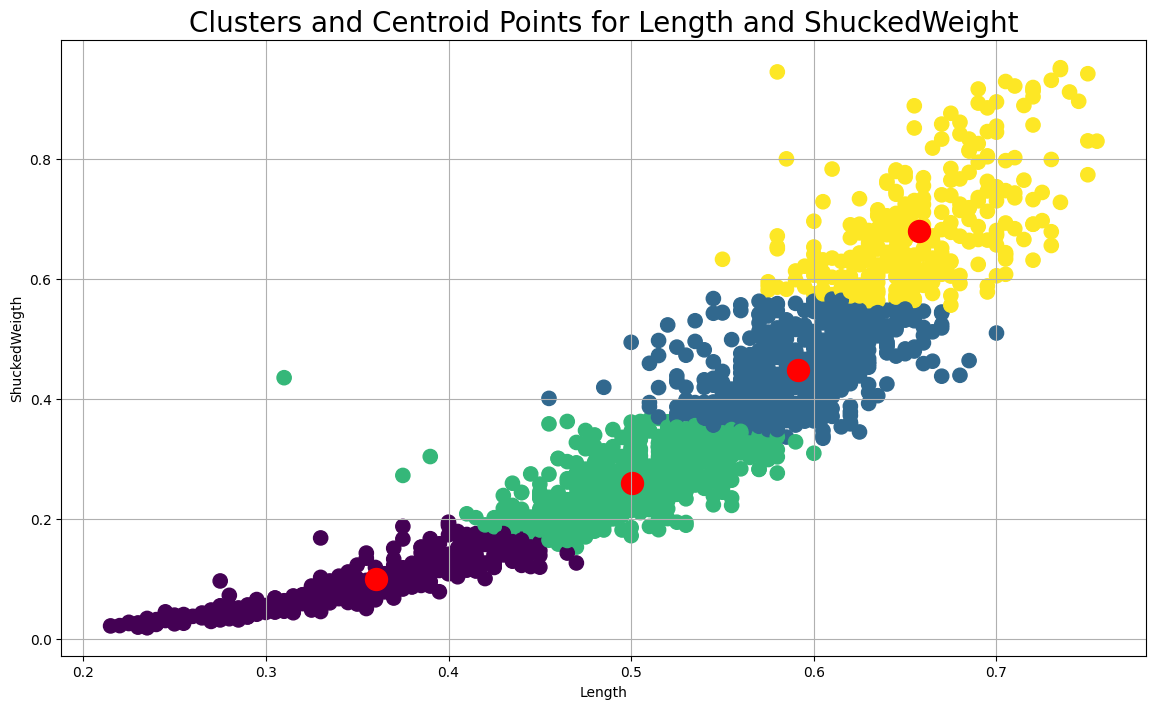

In [ ]:
plt.figure(figsize=(14, 8))
plt.scatter(X2[:, 0], X2[:, 1], c=kmeans.labels_, s=105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], color='red', s=250)
plt.title('Clusters and Centroid Points for Length and ShuckedWeight', fontsize=20)
plt.xlabel('Length')
plt.ylabel('ShuckedWeigth')
plt.grid(True)
plt.show()